In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mstats

from linearmodels import PanelOLS

In [3]:
df = pd.read_csv('data/KLD_Compustat_keep.csv', dtype={'gvkey': str})

In [4]:
df.shape

(43331, 99)

In [6]:
df.columns

Index(['ticker_KLD', 'cusip_KLD', 'companyname', 'year', 'date', 'permno',
       'gvkey', 'datadate', 'fyear', 'cusip', 'ticker', 'companyid', 'size',
       'lev', 'b_mkt', 'rdi', 'adi', 'sale', 'cogs', 'ppegt', 'xsga', 'xlr',
       'emp', 'xad', 'xrd', 'at', 'sich', 'ppent', 'aqc', 'capx', 'capxv',
       'gpm', 'npm', 'roa', 'roe', 'bm', 'evm', 'pe_exi', 'pe_exi.1', 'pe_ib',
       'pe_ni', 'rd_sale', 'adv_sale', 'xsga_sale', 'markup_acct',
       'market_sale', 'div_sale', 'markup', 'makrup_overhead', 'econ_profit',
       'profit_rate', 'op_profit_rate', 'econ_roa', 'positive', 'negative',
       'positive_avg', 'negative_avg', 'KLD Index', 'KLD Index Norm', 'E_pos',
       'E_neg', 'E Index', 'S_pos', 'S_neg', 'S Index', 'G_pos', 'G_neg',
       'G Index', 'Controv Index', 'COM_pos', 'COM_neg', 'ESG_COM', 'DIV_pos',
       'DIV_neg', 'ESG_DIV', 'EMP_pos', 'EMP_neg', 'ESG_EMP', 'ENV_pos',
       'ENV_neg', 'ESG_ENV', 'HUM_pos', 'HUM_neg', 'ESG_HUM', 'PRO_pos',
       'PRO_neg', 

Lists of dependent and independent variables:

In [7]:
KLD_list = ['positive', 'negative', 'positive_avg', 'negative_avg', # positive, negative, averages
            'KLD Index', 'KLD Index Norm',                          # ESG Aggregate Index included controversial, and normalized
            'E_pos', 'E_neg', 'E Index',                            # Environmental aggregate
            'S_pos', 'S_neg', 'S Index',                            # Social aggregate
            'G_pos', 'G_neg', 'G Index',                            # Governance aggregate
            'Controv Index',                                        # Controversial aggregate
            'COM_pos', 'COM_neg', 'ESG_COM',                        # Community
            'DIV_pos', 'DIV_neg', 'ESG_DIV',                        # Diversity
            'EMP_pos', 'EMP_neg', 'ESG_EMP',                        # Employee relations
            'ENV_pos', 'ENV_neg', 'ESG_ENV',                        # Environment
            'HUM_pos', 'HUM_neg', 'ESG_HUM',                        # Human rights
            'PRO_pos', 'PRO_neg', 'ESG_PRO',                        # Product Quality
            'CGOV_pos', 'CGOV_neg', 'ESG_CGOV',                     # Corporate Governance
            'ESG_A_ex_CG_pos', 'ESG_A_ex_CG_neg', 'ESG Pos-Neg Ex-CG Index', # ESG Aggregate excluded Corporate Governance
            'ESG_A_pos', 'ESG_A_neg', 'ESG Pos-Neg A Index']        # ESG Aggregate included Corporate Governance

In [8]:
Comp_level_list = ['sale', 'cogs', 'ppegt', 'xsga', 'xlr', 'emp', 'xad', # Compustat level variables
                   'xrd', 'at', 'sich', 'ppent', 'aqc', 'capx', 'capxv']

In [9]:
Comp_ratio_list = ['gpm', 'npm', 'roa', 'roe',                        # Profitability ratios
                   'bm', 'evm', 'pe_exi', 'pe_exi', 'pe_ib', 'pe_ni', # Valuation ratios
                   'rd_sale', 'adv_sale', 'xsga_sale',                # R&D, Ads, SG&A to sales ratios
                   'markup_acct', 'market_sale', 'div_sale',          # Sales to COGS, Market Value share of Sales & Dividends share of Sales
                   'markup', 'makrup_overhead', 'econ_profit', 'profit_rate', 'op_profit_rate', 'econ_roa'] # Production-based Markups & Profit rates as a measure of market power

In [10]:
Control_list = ['size', 'lev', 'b_mkt', 'rdi', 'adi'] # log(assets), leverage: the ratio of total debt to the market value of equity, beta, R&D intensity, ads intensity

In [24]:
len(KLD_list) + len(Comp_level_list) + len(Comp_ratio_list) + len(Control_list)

84

In [68]:
df = df[df['sale']>0]

In [73]:
df.shape

(43063, 99)

In [148]:
def wins(s):
    return mstats.winsorize(s, limits=[0.01, 0.01])

In [187]:
pd.Series(wins(df.sale[df.fyear==2015])).describe()

count      2082.000000
mean       5746.229244
std       14384.649660
min           5.653000
25%         468.781500
50%        1370.602000
75%        4162.933000
max      101751.800000
dtype: float64

In [184]:
df[['sale','fyear']].groupby('fyear')['sale'].transform(wins)[df.fyear==2015].describe()

count      2082.000000
mean       5746.229244
std       14384.649660
min           5.653000
25%         468.781500
50%        1370.602000
75%        4162.933000
max      101751.800000
Name: sale, dtype: float64

In [181]:
df[['sale','fyear']].groupby('fyear')['sale'].transform(wins).describe()

count     43063.000000
mean       4561.564519
std       10767.785276
min           2.026000
25%         329.373500
50%        1071.849000
75%        3612.358500
max      101751.800000
Name: sale, dtype: float64

In [128]:
pd.Series(wins(df.sale)).describe()

count    43063.000000
mean      4524.985295
std      10375.984498
min          5.535000
25%        329.373500
50%       1071.849000
75%       3612.358500
max      71633.000000
dtype: float64

In [136]:
df.sale.describe()

count     43063.000000
mean       5145.955116
std       16871.307116
min           0.010000
25%         329.373500
50%        1071.849000
75%        3612.358500
max      483521.000000
Name: sale, dtype: float64

Descriptive statistics of KLD variables

In [78]:
for var in KLD_list:
    print(var.upper() + ' Summary\n'+ str(df[var].describe()) + '\n')

POSITIVE Summary
count    43063.000000
mean         1.513550
std          2.267665
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         22.000000
Name: positive, dtype: float64

NEGATIVE Summary
count    43063.000000
mean         1.694657
std          1.873601
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         18.000000
Name: negative, dtype: float64

POSITIVE_AVG Summary
count    43020.000000
mean         0.061966
std          0.101723
min          0.000000
25%          0.000000
50%          0.026316
75%          0.078947
max          1.000000
Name: positive_avg, dtype: float64

NEGATIVE_AVG Summary
count    43063.000000
mean         0.047570
std          0.052535
min          0.000000
25%          0.000000
50%          0.027778
75%          0.075000
max          0.533333
Name: negative_avg, dtype: float64

KLD INDEX Summary
count    43063.000000
mean        -0.181107
std          2.431604


Descriptive statistics of Compustat level variables

In [133]:
for var in Comp_level_list:
    print(var.upper() + ' & winsorized Summary\n'+ str(df[var].describe()) + '\n' + str(pd.Series(wins(df[var])).describe()) +'\n')

SALE & winsorized Summary
count     43063.000000
mean       5145.955116
std       16871.307116
min           0.010000
25%         329.373500
50%        1071.849000
75%        3612.358500
max      483521.000000
Name: sale, dtype: float64
count    43063.000000
mean      4524.985295
std      10375.984498
min          5.535000
25%        329.373500
50%       1071.849000
75%       3612.358500
max      71633.000000
dtype: float64

COGS & winsorized Summary
count     43063.00000
mean       3424.88892
std       12470.16870
min        -669.21800
25%         151.61750
50%         612.80000
75%        2262.65850
max      355913.00000
Name: cogs, dtype: float64
count    43063.000000
mean      2920.260102
std       6965.776990
min          5.490000
25%        151.617500
50%        612.800000
75%       2262.658500
max      48650.000000
dtype: float64

PPEGT & winsorized Summary
count     38656.000000
mean       3733.981096
std       14153.156495
min           0.000000
25%         116.198000
50%     

Descriptive statistics of Compustat ratio variables

In [168]:
for var in Comp_ratio_list:
    print(var.upper() + ' & winsorized Summary\n'+ str(df[var].describe()) + '\n' + str(pd.Series(wins(df[var])).describe()) +'\n')

GPM & winsorized Summary
count    43063.000000
mean        -2.007729
std        164.752981
min     -29325.700000
25%          0.231097
50%          0.379131
75%          0.583231
max          2.117325
Name: gpm, dtype: float64
count    43063.000000
mean         0.338307
std          0.621714
min         -4.607493
25%          0.231097
50%          0.379131
75%          0.583231
max          0.937562
dtype: float64

NPM & winsorized Summary
count    43063.000000
mean        -2.729566
std        168.076489
min     -29319.000000
25%          0.012666
50%          0.055398
75%          0.110658
max         68.516340
Name: npm, dtype: float64
count    43063.000000
mean        -0.095895
std          0.963999
min         -8.185920
25%          0.012666
50%          0.055398
75%          0.110658
max          0.384652
dtype: float64

ROA & winsorized Summary
count    43063.000000
mean         0.100133
std          0.176807
min        -12.412666
25%          0.047785
50%          0.110635
75%  

Descriptive statistics of control variables

In [135]:
for var in Control_list:
    print(var.upper() + ' & winsorized Summary\n'+ str(df[var].describe()) + '\n' + str(pd.Series(wins(df[var])).describe()) +'\n')

SIZE & winsorized Summary
count    43063.000000
mean         7.519840
std          1.799969
min         -0.021224
25%          6.233882
50%          7.418705
75%          8.650697
max         14.760632
Name: size, dtype: float64
count    43063.000000
mean         7.517359
std          1.762390
min          3.847548
25%          6.233882
50%          7.418705
75%          8.650697
max         12.263067
dtype: float64

LEV & winsorized Summary
count    4.286100e+04
mean     8.523564e+01
std      1.421061e+04
min     -4.580280e-02
25%      4.011886e-02
50%      2.145987e-01
75%      5.925188e-01
max      2.886261e+06
Name: lev, dtype: float64
count    43063.000000
mean         0.657890
std          1.601930
min          0.000000
25%          0.040871
50%          0.216696
75%          0.601284
max         12.628720
dtype: float64

B_MKT & winsorized Summary
count    41317.000000
mean         1.222668
std          0.800161
min         -9.065500
25%          0.683000
50%          1.099600
7

In [164]:
sum(df['roe']<0)

8111

In [165]:
sum(pd.Series(wins(df['roe']))<0)

8111

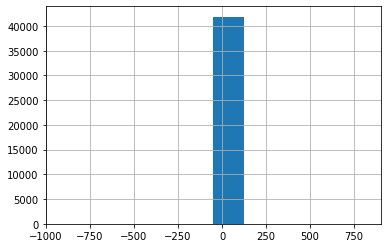

In [166]:
df['roe'].hist()

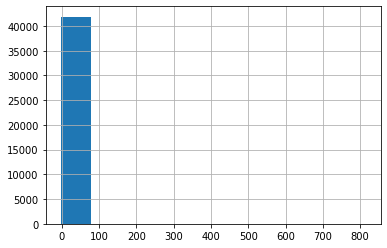

In [167]:
pd.Series(wins(df['roe'])).hist()